<a href="https://colab.research.google.com/github/sam2005-max/Space_Invaders_Deep-Q-Networks/blob/main/Space_Invaders_Deep_Q_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gym[atari]
!pip install autorom[accept-rom-license]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 43.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.5.5-py3-none-any.whl size=441098 sha256=43e804615189ff1aef9564dc7c5597e30488b23173bd9d20d25838427b1f3783
  Stored in directory: /root/.cache/pip/wheels/c3/86/6f/e96885ff274388b9f0636418a2926f46f076cd7e891670321d
Successfully built AutoROM.accept-rom-license


In [9]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get ROM
from ale_py import ALEInterface
ale = ALEInterface()

from ale_py.roms import SpaceInvaders
ale.loadROM(SpaceInvaders)

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


6
['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


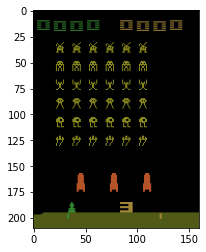

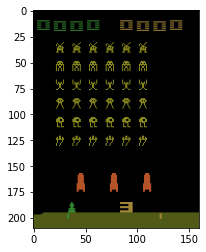

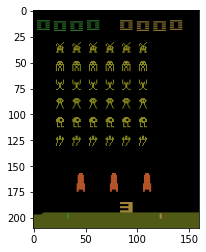

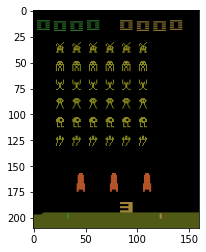

In [4]:
env = gym.make("ALE/SpaceInvaders-v5")
n_outputs = env.action_space.n
print(n_outputs)
print(env.env.get_action_meanings())

observation = env.reset()

for i in range(25):
  
  if i > 20:
    plt.imshow(observation)
    plt.show()

  observation, _, _, _ = env.step(1)


In [10]:
color = np.array([210, 164, 74]).mean()
def preprocess_observation(obs):
    # Crop and resize the image
    img = obs[25:201:2, ::2]
    # Convert the image to greyscale
    img = img.mean(axis=2)
    # Improve image contrast
    img[img==color] = 0
    # Next we normalize the image from -1 to +1
    img = (img - 128) / 128 - 1
    return img.reshape(88,80)

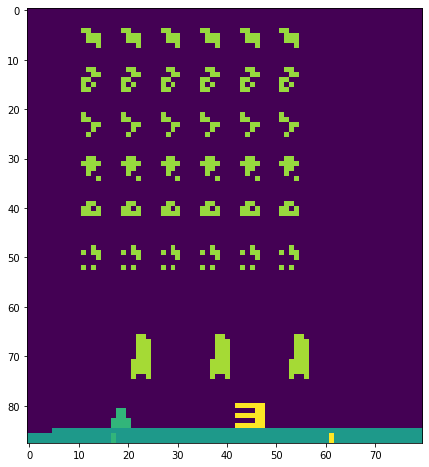

(210, 160, 3)
(88, 80)


In [11]:
obs_preprocessed = preprocess_observation(observation).reshape(88,80)
plt.imshow(obs_preprocessed)
plt.show()
print(observation.shape)
print(obs_preprocessed.shape)

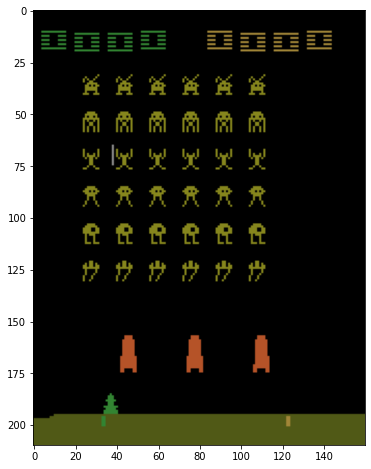

In [12]:
for i in range(22):
  
  if i > 20:
    plt.imshow(observation)
    plt.show()

  observation, _, _, _ = env.step(1)